## Tasks

This my proposed solution to the given assessment. The Chi-squared test for independence is a statistical
hypothesis test. It is used to analyse whether two categorical variables are independent. The Wikipedia article on the test for independance gives the table below as an example, stating the Chi-squared value based on it is approximately 24.6. The objective is to use scipy.stats and leverage the Chi-squared test for independence, to verify the given stastical values and calculate the associated p value.  

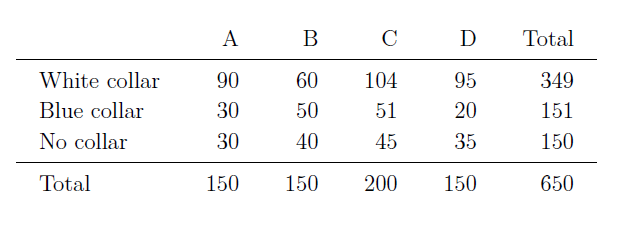

The author is Anthony Moore (G00170900@gmit.ie)
***
#### Task: Verify the Chi-squared value is approx 24.6 and determine the p value
***
I began by first reading the referenced wikipedia article to try and buld an understanding on what the Chi-squared test for independance was and how to apply it. The chi-squared test for independance is used to determine whether there is a statistically significant difference between the expected frequencies and the observed frequencies in one or more categories of a contingency table [1].

I also had a read over the scipy.stats.chisquare documentation [2] to search for an explaination on how the formula operates. Much to my joy I discovered that the scipy documention is both extreamly detailed and user friendly. It even came with practical example on how to implement the formula into a solution.

[1] Chi-squared test - https://en.wikipedia.org/wiki/Chi-squared_test#Chi-squared_test_for_variance_in_a_normal_population

[2] scipy.stats.chisquare - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html


#### Test Code: Ensure the scipy.stats.chisquare library is working correctly

In [1]:
# effecient numerical arrays
import numpy as np
# data frames
import scipy.stats
# chi square library
from scipy.stats import chisquare

# test chisquare for mean of the observed frequencies.
print("Test1: ", chisquare([1, 2, 3, 4, 5]))
# mean of the observed frequencies with expected frequencies
print("Test2: ", chisquare([1, 2, 3, 4, 5], f_exp=[1, 1, 2, 3, 4]))

Test1:  Power_divergenceResult(statistic=3.333333333333333, pvalue=0.5036682742334986)
Test2:  Power_divergenceResult(statistic=2.083333333333333, pvalue=0.7204349163118167)


#### Verify the Chi-squared value

In [2]:
# make a 2d array of observed results
obs = np.array([[90, 60, 104, 95], [30, 50, 51, 20], [30, 40, 45, 35]])
# display array shape
print("Array Dimersions: ", obs.shape)
# find chisquare and pValue
chisquare(obs, axis=None)

Array Dimersions:  (3, 4)


Power_divergenceResult(statistic=156.62153846153845, pvalue=6.588067527281063e-28)

#### Observation

My result was clearly way off the expected 24.6 that wikipedia suggested. This could have potentially ment that the wikipedia result was incorrect. However, I was rather skeptical and was more inclined to believe that I had made and error somewhere. I quickly glanced over my input paramaters to ensure they were correct and everything seemed to be in order.

I then consulted the scipy documentation to ensure that I had not misenteriperated how the function was supposed be applied. On second inspection, I discovered that perhaps the function I used was not the correct one for this type of categorical data. It would apprear that it for was for testing the null hypothesis.

> Calculate a one-way chi-square test.

> The chi-square test tests the null hypothesis that the categorical data has the given frequencies.

Looking through the scipy documentation I came across scipy.stats.chi2_contingency [3]. This seemed to be more inline with the description used in the wikipedia article [1].It would seem that this version of the function is an application of Pearson's chi-squared test [4].

> Chi-square test of independence of variables in a contingency table.

> This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table [5] observed.

[3] scipy.stats.chi2_contingency - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

[4] Pearson's chi-squared test - https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test

[5] Contingency Table - https://en.wikipedia.org/wiki/Contingency_table


In [3]:
from scipy.stats import chi2_contingency

# make a 2d array of observed results
obs1 = np.array([[90, 60, 104, 95], [30, 50, 51, 20], [30, 40, 45, 35]])
# print results (chi, p ,dof, expected : ndarray)
print(chi2_contingency(obs1))

# format results
result = chi2_contingency(obs1)
print("\nchi-square-value: ", result[0])
print("p-value: ", result[1])


(24.5712028585826, 0.0004098425861096696, 6, array([[ 80.53846154,  80.53846154, 107.38461538,  80.53846154],
       [ 34.84615385,  34.84615385,  46.46153846,  34.84615385],
       [ 34.61538462,  34.61538462,  46.15384615,  34.61538462]]))

chi-square-value:  24.5712028585826
p-value:  0.0004098425861096696


## Conclusion

Using this scipy function I was able to replicate the same results as the wikipedia article and calculate the associated p value. This would indeed verify that the results on the wikipedia article are correct.